### Задание 1. Восстановите данные
Ниже представлены опросные данные. Необходимо заполнить пропуски и исправить ошибки

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive, files
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
df = pd.read_excel(file_path)

df.head()

,Result,stage,cost,patent,rd,eco,npv,pp,phd,foreigners,...,potential,fin_support,age,success,compet,investors,support,complexity,non_discl,city
0,0,3.0,12.2,0,1,0,2.73,57.0,0.0,0,...,0.27,1,46.0,1,1,4,1,3,0,Московская область
1,0,4.0,11.2,0,0,5,7.88,30.0,0.0,0,...,0.17,0,47.0,1,5,5,0,2,0,Moskovskaya oblast
2,1,4.0,22.0,0,0,5,16.86,83.0,0.0,1,...,28.00,1,48.0,8,5,1,1,2,0,Samara
3,0,52.0,25.6,1,0,5,5.44,149.0,0.1,0,...,0.28,1,52.0,1,2,2,1,2,1,Saratov
4,0,3.0,2.0,0,0,5,4.53,18.0,0.0,1,...,0.10,0,48.0,0,5,1,0,3,0,Московская область


In [ ]:
df.dtypes

Result           int64
stage          float64
cost           float64
patent           int64
rd               int64
eco              int64
npv            float64
pp             float64
phd            float64
foreigners       int64
university       int64
market           int64
risks            int64
own_res          int64
unic           float64
potential      float64
fin_support      int64
age            float64
success          int64
compet           int64
investors        int64
support          int64
complexity       int64
non_discl        int64
city            object
dtype: object

In [ ]:
!pip install python-docx

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 239.6/239.6 kB 3.2 MB/s eta 0:00:00


In [ ]:
import docx

desc = docx.Document(doc_path)
print(*[par.text for par in desc.paragraphs], sep = '\n')

Result - проект поддержан фондом (0-нет, 1 –да);

 age - возраст руководителя;
 compet -оценка уровня конкуренции (1-5);
 complexity- оценка технологической сложности проекта (1-5);
 cost- объем денежных средств, необходимых для поддержки проекта, млн. руб.;
 eco- влияние используемой технологии на окружающую среду (0-негативное, 5-нейтральное, 10- экологичное решение);
fin_support - финансовая поддержка правительства;
 foreigners- наличие иностранных участников (1- есть, 0 –нет);
 investors - количество инвесторов;
 market- наиболее важный рынок сбыта 1- местный, региональный, 2-общероссийский, 3-стран СНГ, 4 – европейский, 5 –другие;
 non-discl- наличие соглашений о неразглашении (с персоналом или партнерами);
 npv- чистая приведенная стоимость проекта, млн. руб.;
 own_res - доля собственных ресурсов, %;
 patent - существует ли возможность получения патента (1-существует, 0-нет);
 phd - доля персонала с ученой степенью;
 potential - оценка потенциала рынка (% возможной доли рынка)
 p

переменные с пропусками: stage npv pp phd unic age  
переменные с ошибками: stage patent rd npv pp phd foreigners own_res potential success city

Из-за специфики данных заменять все пропуски на, например, медиану, неправильно. Поэтому, я прохожусь по каждой переменной отдельно, смотря на ошибки и пропуски в данных.

NAME: Result
NAN COUNT: 0


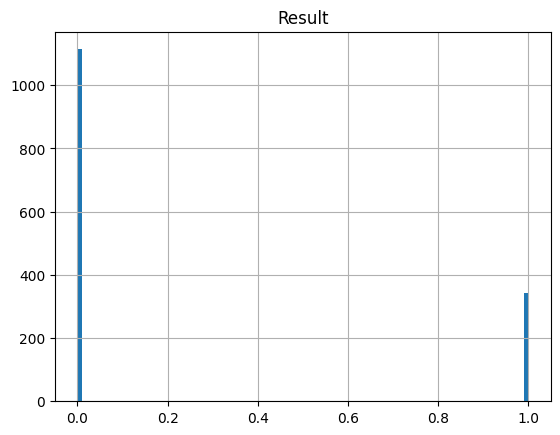

In [ ]:
i = 0

print(f'NAME: {df.columns[i]}')
print(f'NAN COUNT: {df[df.columns[i]].isna().sum()}')
df.hist(column=df.columns[i], bins=100);

In [ ]:
#классы несбалансированы, что может создать проблемы при обучении, но, помимо этого, все норм

NAME: stage
NAN COUNT: 66


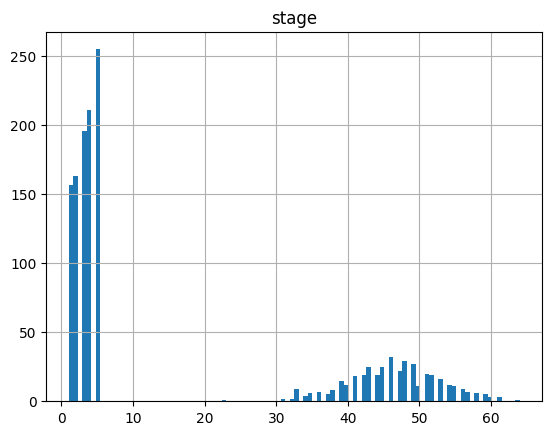

In [ ]:
i = 1

print(f'NAME: {df.columns[i]}')
print(f'NAN COUNT: {df[df.columns[i]].isna().sum()}')
df.hist(column=df.columns[i], bins=100);

Люди, вписавшие значения от 20 до 70, имели ввиду значение в десятичном формате, то есть 2.0 - 7.0.
Так как макс. значение параметра - 5, то после преобразования мы значения больше 5 переводим в 5.

In [ ]:
df['stage'] = np.where(df['stage'] > 20, round(df['stage']/10,0), df['stage'])
df['stage'] = np.where(df['stage'] > 5, 5, df['stage'])
df['stage'].value_counts()

5.0    488
4.0    370
3.0    213
2.0    164
1.0    157
Name: stage, dtype: int64

Есть пропуски, которые можно было бы заменить на моду, но, так как категории более-менее равномерно распределены,
то такая замена может сильно исказить данные, сделав моду излишне представленной.
Вместо этого вероятностно присвоим значения, то есть случайно назначим значения, где шанс присвоения конкретной категории
равняется частоте этой категории, деленной на частоту всех групп

In [ ]:
probs = df['stage'].value_counts(normalize=True)
probs

5.0    0.350575
4.0    0.265805
3.0    0.153017
2.0    0.117816
1.0    0.112787
Name: stage, dtype: float64

In [ ]:
df.loc[df['stage'].isnull(),'stage'] = np.random.choice(probs.index, size=len(df[df['stage'].isnull()]),p=probs.values)
df['stage'].value_counts()

5.0    507
4.0    385
3.0    228
2.0    177
1.0    161
Name: stage, dtype: int64

NAME: cost
NAN COUNT: 0


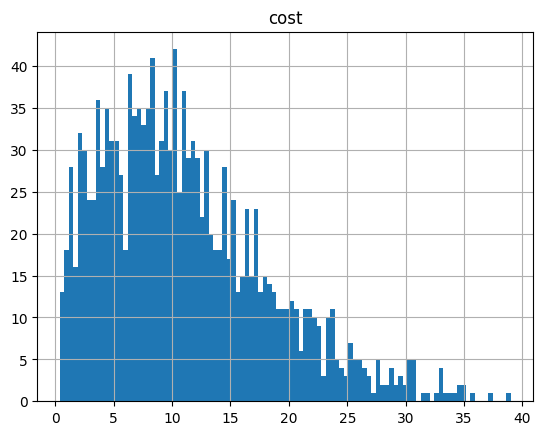

In [ ]:
i = 2

print(f'NAME: {df.columns[i]}')
print(f'NAN COUNT: {df[df.columns[i]].isna().sum()}')
df.hist(column=df.columns[i], bins=100);

In [ ]:
#все норм

NAME: patent
NAN COUNT: 0


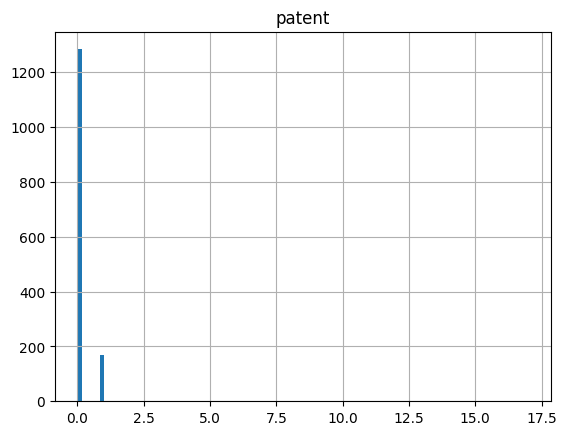

In [ ]:
i = 3

print(f'NAME: {df.columns[i]}')
print(f'NAN COUNT: {df[df.columns[i]].isna().sum()}')
df.hist(column=df.columns[i], bins=100);

Респонденты, вписавшие больше 1, скорее всего написали кол-во вещей,
на которые есть возможность получения патента. Так, заменяем значения больше 1 на 1

In [ ]:
df['patent'] = np.where(df['patent'] > 1, 1, df['patent'])
df['patent'].value_counts()

0    1283
1     175
Name: patent, dtype: int64

NAME: rd
NAN COUNT: 0


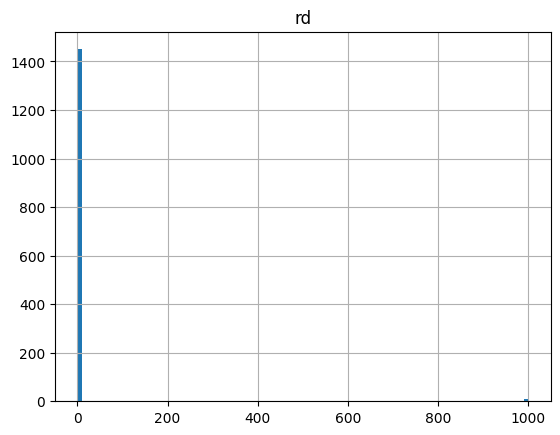

In [ ]:
i = 4

print(f'NAME: {df.columns[i]}')
print(f'NAN COUNT: {df[df.columns[i]].isna().sum()}')
df.hist(column=df.columns[i], bins=100);

In [ ]:
#заменяем 1000 на 1

In [ ]:
df['rd'] = np.where(df['rd'] > 1, 1, df['rd'])
df['rd'].value_counts()

0    1158
1     300
Name: rd, dtype: int64

NAME: eco
NAN COUNT: 0


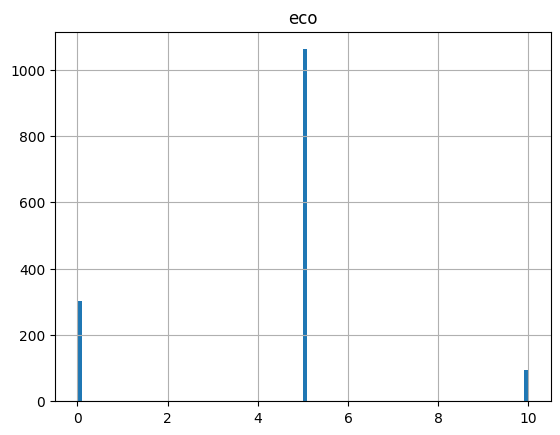

In [ ]:
i = 5

print(f'NAME: {df.columns[i]}')
print(f'NAN COUNT: {df[df.columns[i]].isna().sum()}')
df.hist(column=df.columns[i], bins=100);

In [ ]:
#все норм

NAME: npv
NAN COUNT: 71


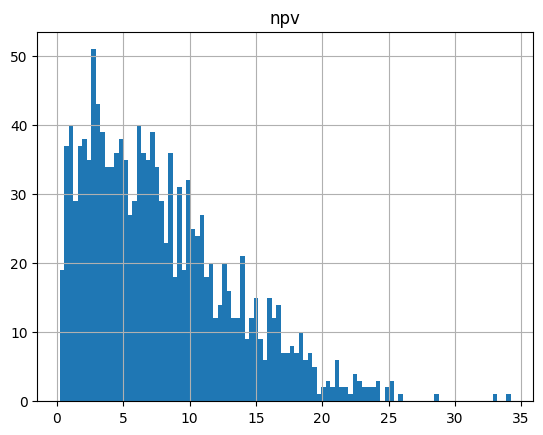

In [ ]:
i = 6

print(f'NAME: {df.columns[i]}')
print(f'NAN COUNT: {df[df.columns[i]].isna().sum()}')
df.hist(column=df.columns[i], bins=100);

In [ ]:
#распределение адекватное, пропуски заменяем на медиану

nan count: 0


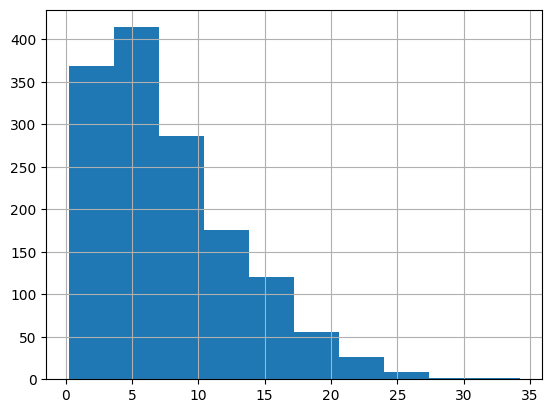

In [ ]:
df['npv'] = df['npv'].fillna(df['npv'].median())
df['npv'].hist();
print('nan count:', df['npv'].isna().sum())

NAME: pp
NAN COUNT: 84


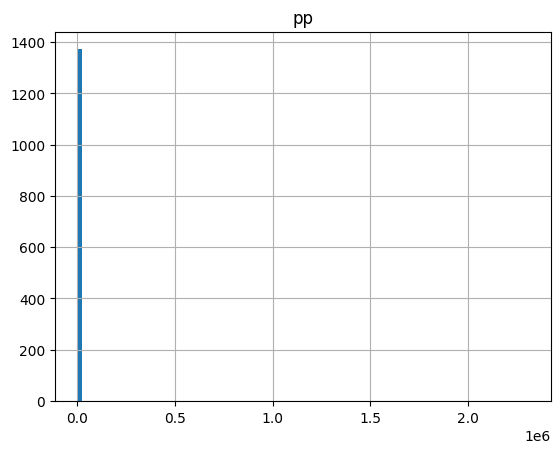

In [ ]:
i = 7

print(f'NAME: {df.columns[i]}')
print(f'NAN COUNT: {df[df.columns[i]].isna().sum()}')
df.hist(column=df.columns[i], bins=100);

<Axes: >

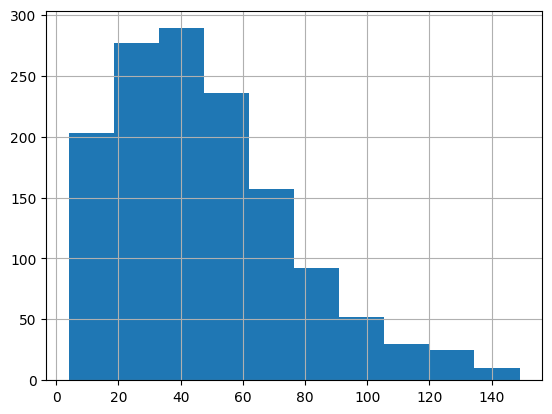

In [ ]:
#судя по гистраграмме, есть аномальные значения, построим гистаграмму на меньшем диапозоне
df[df.columns[i]][df[df.columns[i]] < 1000].hist()

итак, до 160 распределение нормальное, потом идет огромный пропуск и идут экстремальные значения.
Заменяем значения больше 160 и пропуски на медиану

Axes(0.125,0.11;0.775x0.77) nan count: 0


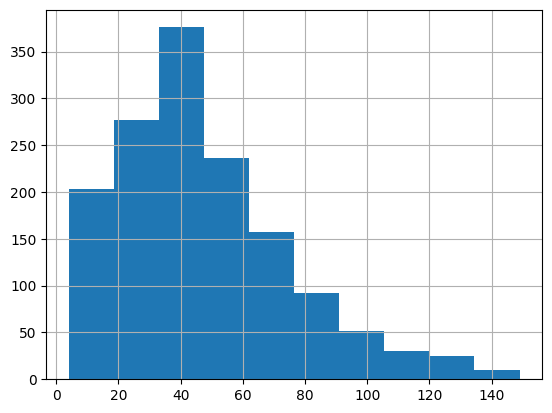

In [ ]:
df['pp'] = df['pp'].fillna(df['pp'].median())
df['pp'] = np.where(df['pp'] > 160, df['pp'].median(), df['pp'])
print(df['pp'].hist(), 'nan count:', df['pp'].isna().sum())

NAME: phd
NAN COUNT: 111


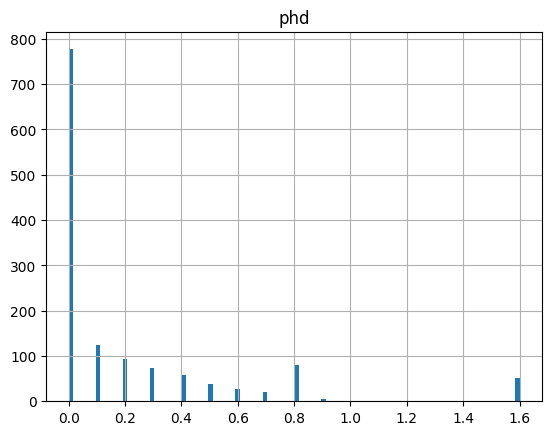

In [ ]:
i = 8

print(f'NAME: {df.columns[i]}')
print(f'NAN COUNT: {df[df.columns[i]].isna().sum()}')
df.hist(column=df.columns[i], bins=100);

люди вписавшие 1.6 скорее всего имели ввиду просто 0.6. пропуски заменяем на моду (0.0)

Axes(0.125,0.11;0.775x0.77) nan count: 0


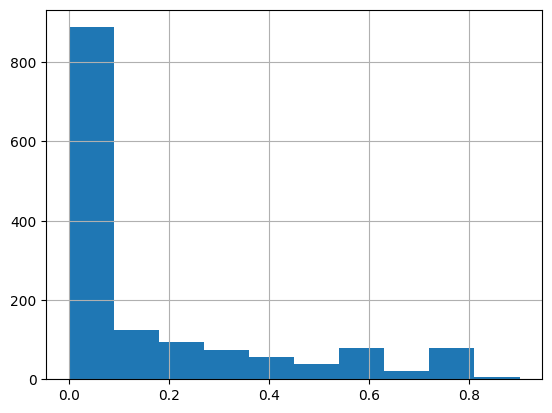

In [ ]:
df['phd'] = df['phd'].fillna(df['phd'].mode()[0])
df['phd'] = np.where(df['phd'] > 1, df['phd'] - 1, df['phd'])
print(df['phd'].hist(), 'nan count:', df['phd'].isna().sum())

NAME: foreigners
NAN COUNT: 0


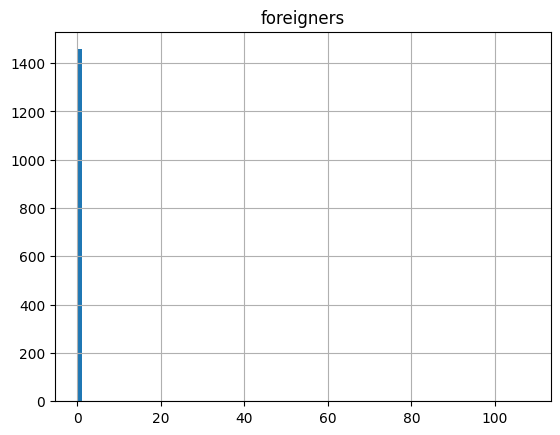

In [ ]:
i = 9

print(f'NAME: {df.columns[i]}')
print(f'NAN COUNT: {df[df.columns[i]].isna().sum()}')
df.hist(column=df.columns[i], bins=100);

In [ ]:
df[df.columns[i]].value_counts()

0      1273
1       184
108       1
Name: foreigners, dtype: int64

люди вписавшие 108 скорее всего вписали кол-во иностранцев, заменяем на 1

Axes(0.125,0.11;0.775x0.77) nan count: 0


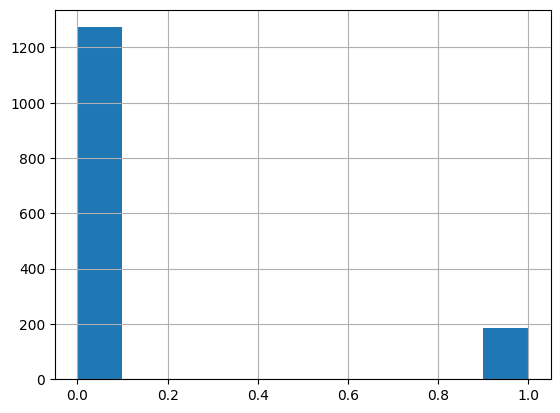

In [ ]:
df['foreigners'] = np.where(df['foreigners'] > 1, 1, df['foreigners'])
print(df['foreigners'].hist(), 'nan count:', df['foreigners'].isna().sum())

NAME: university
NAN COUNT: 0


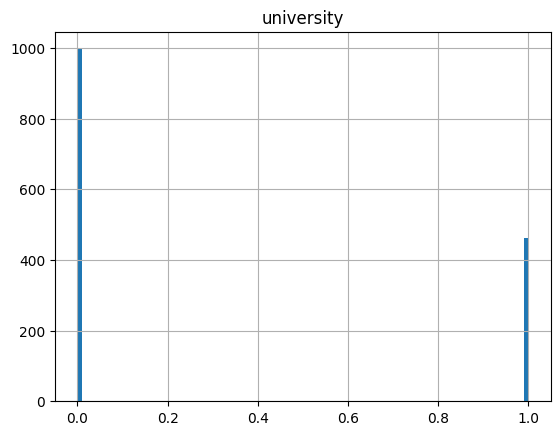

In [ ]:
i = 10

print(f'NAME: {df.columns[i]}')
print(f'NAN COUNT: {df[df.columns[i]].isna().sum()}')
df.hist(column=df.columns[i], bins=100);

In [ ]:
# все норм

NAME: market
NAN COUNT: 0


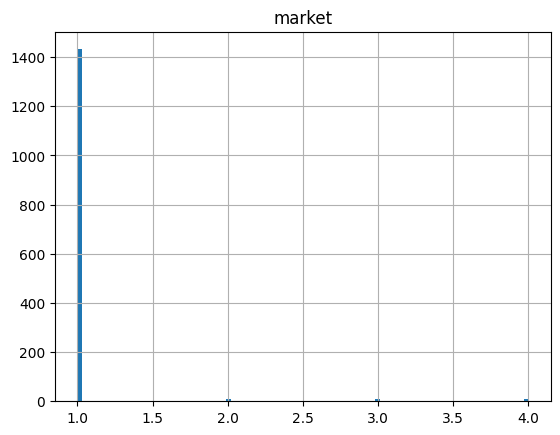

In [ ]:
i = 11

print(f'NAME: {df.columns[i]}')
print(f'NAN COUNT: {df[df.columns[i]].isna().sum()}')
df.hist(column=df.columns[i], bins=100);

In [ ]:
df[df.columns[i]].value_counts()

1    1432
3       9
4       9
2       8
Name: market, dtype: int64

In [ ]:
# все норм

NAME: risks
NAN COUNT: 0


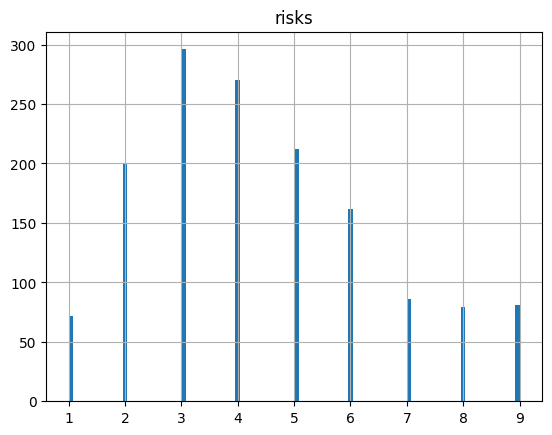

In [ ]:
i = 12

print(f'NAME: {df.columns[i]}')
print(f'NAN COUNT: {df[df.columns[i]].isna().sum()}')
df.hist(column=df.columns[i], bins=100);

In [ ]:
# все норм

NAME: own_res
NAN COUNT: 0


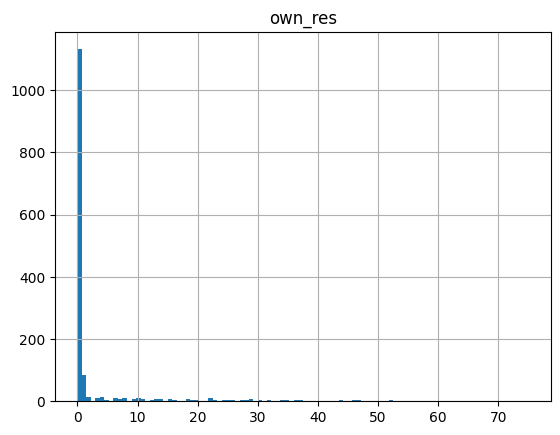

In [ ]:
i = 13

print(f'NAME: {df.columns[i]}')
print(f'NAN COUNT: {df[df.columns[i]].isna().sum()}')
df.hist(column=df.columns[i], bins=100);

все в процентах, переводим в доли

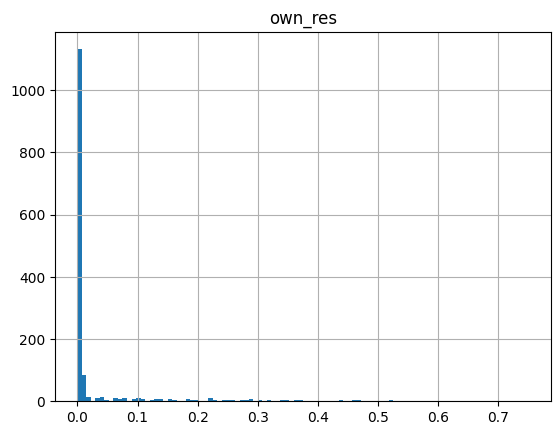

In [ ]:
df['own_res'] = df['own_res'] / 100
df.hist(column='own_res', bins=100);

NAME: unic
NAN COUNT: 165


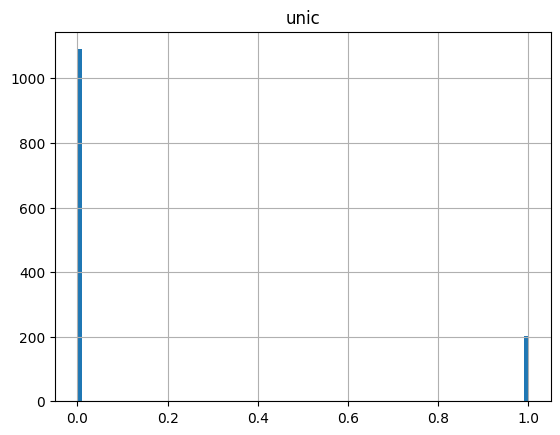

In [ ]:
i = 14

print(f'NAME: {df.columns[i]}')
print(f'NAN COUNT: {df[df.columns[i]].isna().sum()}')
df.hist(column=df.columns[i], bins=100);

пропуски заменяем на медиану (0)

In [ ]:
df['unic'] = df['unic'].fillna(df['unic'].median())
df['unic'].isna().sum()

0

NAME: potential
NAN COUNT: 0


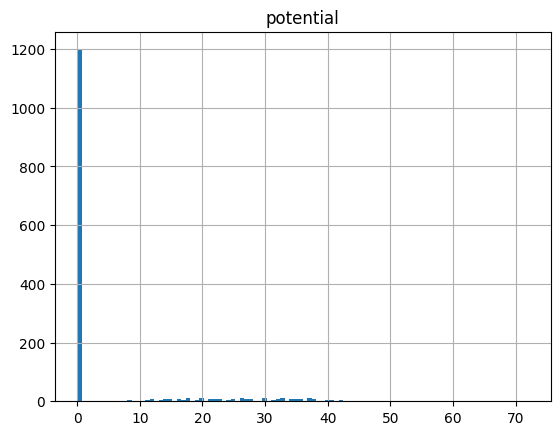

In [ ]:
i = 15

print(f'NAME: {df.columns[i]}')
print(f'NAN COUNT: {df[df.columns[i]].isna().sum()}')
df.hist(column=df.columns[i], bins=100);

кто-то писал в долях, кто-то в процентах. Заменяем значения в процентах на долю

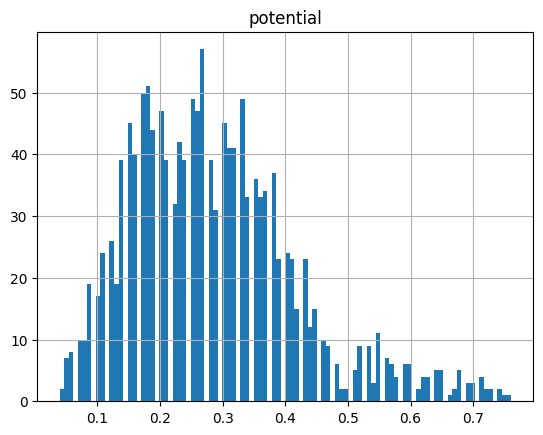

In [ ]:
df['potential'] = np.where(df['potential'] > 1, df['potential'] / 100, df['potential'])
df.hist(column='potential', bins=100);

NAME: fin_support
NAN COUNT: 0


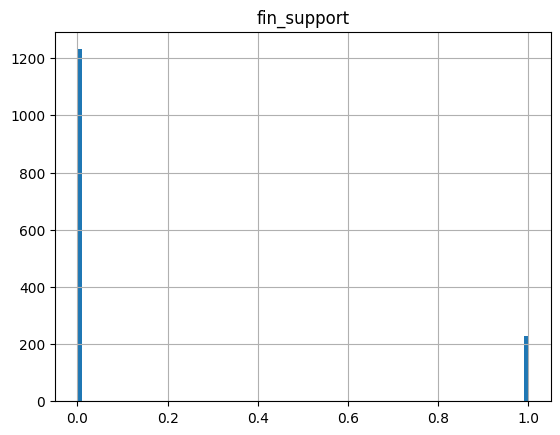

In [ ]:
i = 16

print(f'NAME: {df.columns[i]}')
print(f'NAN COUNT: {df[df.columns[i]].isna().sum()}')
df.hist(column=df.columns[i], bins=100);

In [ ]:
# все норм

NAME: age
NAN COUNT: 33


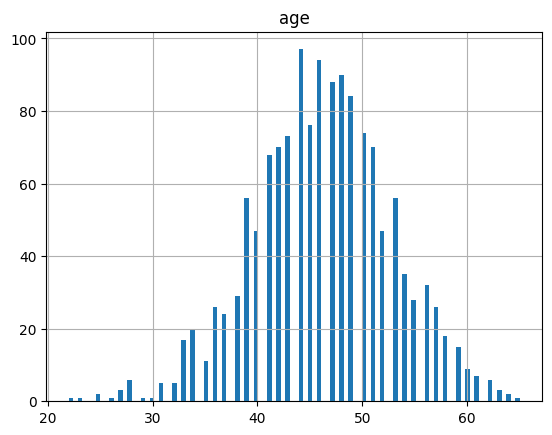

In [ ]:
i = 17

print(f'NAME: {df.columns[i]}')
print(f'NAN COUNT: {df[df.columns[i]].isna().sum()}')
df.hist(column=df.columns[i], bins=100);

аномальных значений нет, пропуски заменяем на медиану

In [ ]:
df['age'] = df['age'].fillna(df['age'].median())
df['age'].isna().sum()

0

NAME: success
NAN COUNT: 0


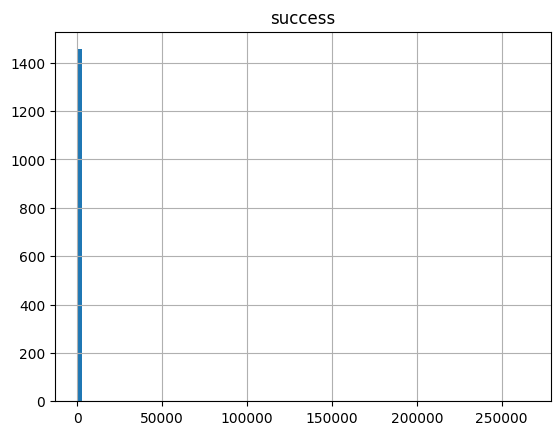

In [ ]:
i = 18

print(f'NAME: {df.columns[i]}')
print(f'NAN COUNT: {df[df.columns[i]].isna().sum()}')
df.hist(column=df.columns[i], bins=100);

In [ ]:
df[df.columns[i]].value_counts()

1         295
4         265
3         240
2         240
0         174
5         170
6          35
7          20
8           9
9           5
265652      1
265653      1
265651      1
13          1
10          1
Name: success, dtype: int64

аномальные значения все начинаются с "26565", что говорит о том, что это, скорее всего, ИД проекта, а не их кол-во.  
Заменяем их на 1

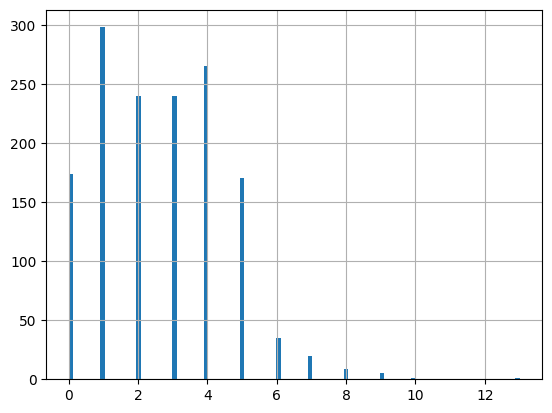

In [ ]:
df['success'] = np.where(df['success'] > 1000, 1, df['success'])
df['success'].hist(bins=100);

NAME: compet
NAN COUNT: 0


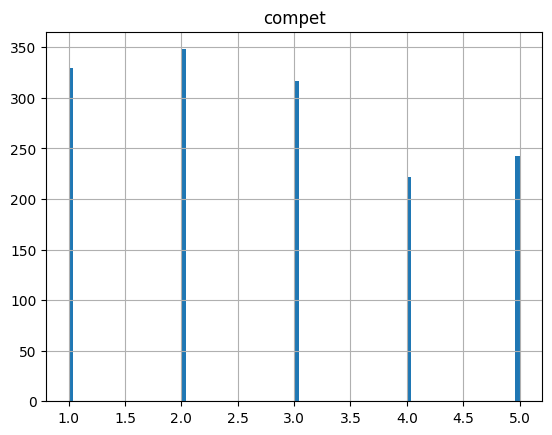

In [ ]:
i = 19

print(f'NAME: {df.columns[i]}')
print(f'NAN COUNT: {df[df.columns[i]].isna().sum()}')
df.hist(column=df.columns[i], bins=100);

In [ ]:
# все норм

NAME: investors
NAN COUNT: 0


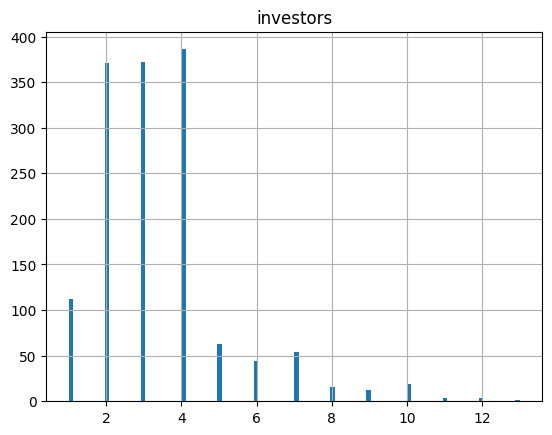

In [ ]:
i = 20

print(f'NAME: {df.columns[i]}')
print(f'NAN COUNT: {df[df.columns[i]].isna().sum()}')
df.hist(column=df.columns[i], bins=100);

In [ ]:
# все норм

NAME: support
NAN COUNT: 0


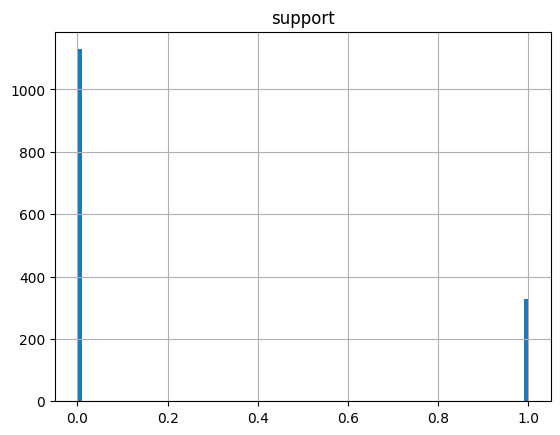

In [ ]:
i = 21

print(f'NAME: {df.columns[i]}')
print(f'NAN COUNT: {df[df.columns[i]].isna().sum()}')
df.hist(column=df.columns[i], bins=100);

In [ ]:
# все норм

NAME: complexity
NAN COUNT: 0


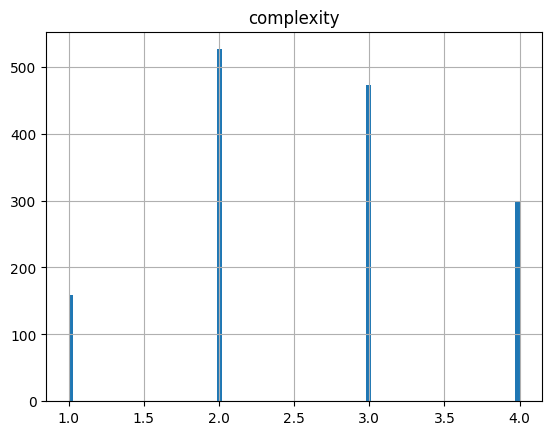

In [ ]:
i = 22

print(f'NAME: {df.columns[i]}')
print(f'NAN COUNT: {df[df.columns[i]].isna().sum()}')
df.hist(column=df.columns[i], bins=100);

In [ ]:
# все норм

NAME: non_discl
NAN COUNT: 0


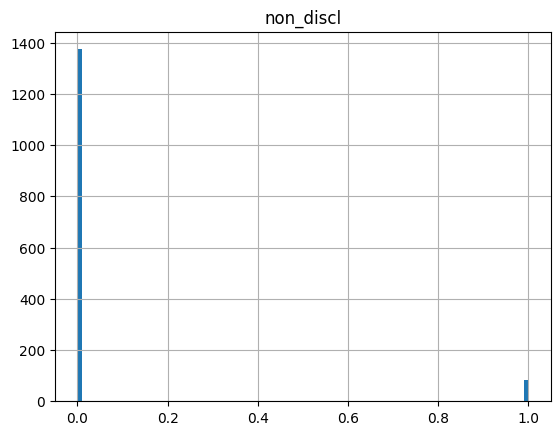

In [ ]:
i = 23

print(f'NAME: {df.columns[i]}')
print(f'NAN COUNT: {df[df.columns[i]].isna().sum()}')
df.hist(column=df.columns[i], bins=100);

In [ ]:
# все норм

In [ ]:
i = 24

print(f'NAME: {df.columns[i]}')
print(f'VALUE COUNTS:\n{df[df.columns[i]].value_counts()}')
print(f'NAN COUNTS: {df[df.columns[i]].isna().sum()}')

NAME: city
VALUE COUNTS:
Moskva                   235
Московская область       208
Moskovskaya oblast       150
spb                      115
N/a                      107
Ленинградская область    104
Krasnoyarsk               89
Moscow                    82
Perm                      82
Moscow region             29
M-w                       22
St. Petersburg            20
Stb                       15
Санкт-Петербург           14
Novosibirsk               14
Зеленоград                14
Калининград               13
N-N                       13
Ekaterinburg              12
Пущино                    11
Dolgoprudny               10
Каzan                     10
Москва                     9
Dubna                      9
Ekat.                      9
Tula                       8
Chelyabinsk                7
Nizhniy Novgorod           7
Samara                     6
Rostov-on-don              6
Dmitrov                    5
Saratov                    5
Pskov                      4
Пермь             

Введем две дамми переменные - для Москвы и Санкт-Петербурга.
N/a, N-N и подобные значения - это пропуски, переводем их в моду

In [ ]:
df['city_Moscow'] = np.where(df['city'].isin(['Moskva', 'M-w', 'Moscow']), 1, 0)
df['city_Spb'] = np.where(df['city'].isin(['spb', 'St. Petersburg', 'Stb', 'Санкт-Петербург']), 1, 0)
print(df['city_Moscow'].value_counts(), df['city_Spb'].value_counts(), sep = '\n\n')

0    1119
1     339
Name: city_Moscow, dtype: int64

0    1294
1     164
Name: city_Spb, dtype: int64


In [ ]:
df['city'].value_counts()['N/a'] + df['city'].value_counts()['N-N']

120

339 проектов находятся в Москве, 164 - в Санкт-Петербурге.

Самая большая категория - мода - это проекты, которые находятся не в Москве и не Санкт-Петербурге - их 835.

Как говорилось ранее, пропускам ставим моду, то есть 0 в обоих дамми, что уже было сделано.

In [ ]:
df = df.drop('city', axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458 entries, 0 to 1457
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Result       1458 non-null   int64  
 1   stage        1458 non-null   float64
 2   cost         1458 non-null   float64
 3   patent       1458 non-null   int64  
 4   rd           1458 non-null   int64  
 5   eco          1458 non-null   int64  
 6   npv          1458 non-null   float64
 7   pp           1458 non-null   float64
 8   phd          1458 non-null   float64
 9   foreigners   1458 non-null   int64  
 10  university   1458 non-null   int64  
 11  market       1458 non-null   int64  
 12  risks        1458 non-null   int64  
 13  own_res      1458 non-null   float64
 14  unic         1458 non-null   float64
 15  potential    1458 non-null   float64
 16  fin_support  1458 non-null   int64  
 17  age          1458 non-null   float64
 18  success      1458 non-null   int64  
 19  compet

### Задание 2. Предварительный анализ данных
Проведите EDA, составив графики для оценки взаимного влияния переменных или их влияния на целевую переменную

<Axes: >

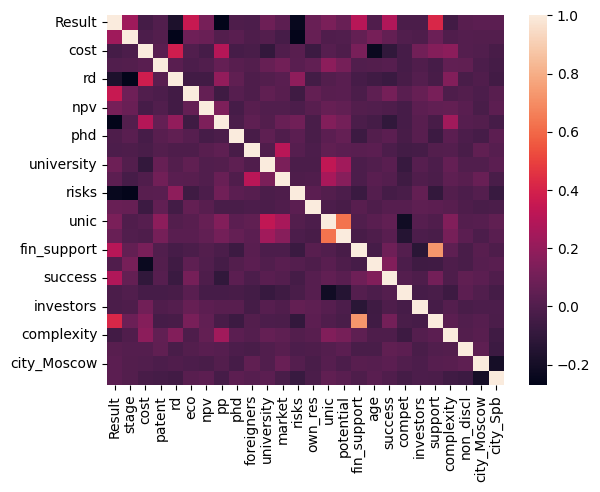

In [ ]:
sns.heatmap(df.corr())

In [ ]:
# Найдем пары переменных с наибольшей корреляцией более наглядным способом:
df.corr().abs().unstack().sort_values()[-len(df.columns)-1:-len(df.columns)-18:-2]

fin_support  support       0.723078
unic         potential     0.623754
Result       support       0.418816
rd           cost          0.375818
Result       eco           0.351937
unic         university    0.330764
foreigners   market        0.306926
fin_support  Result        0.304940
cost         pp            0.297064
dtype: float64

Далее я исследую взаимосвязь между конкретными переменными и предоставляю свои выводы
в конце ноутбука

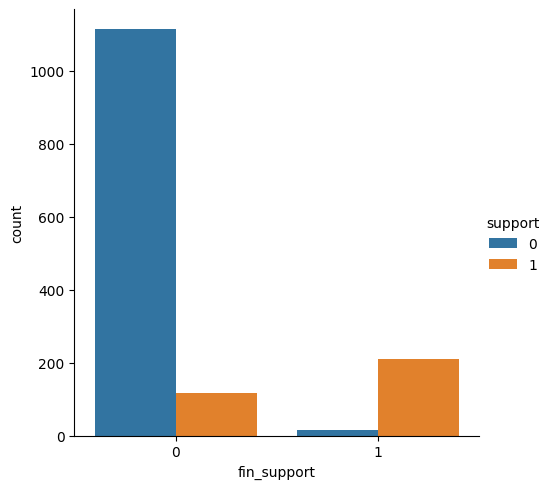

In [ ]:
#переменные fin_support support
sns.catplot(data=df[['fin_support', 'support']], x='fin_support', hue='support', kind='count')

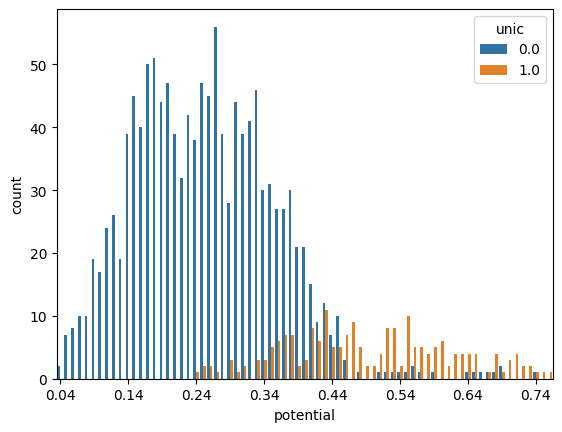

In [ ]:
#переменные potential unic
fig, ax = plt.subplots()

sns.countplot(data=df[['unic', 'potential']], x='potential', hue='unic');
ax.set_xticks(ax.get_xticks()[::10]);

<Axes: xlabel='support', ylabel='count'>

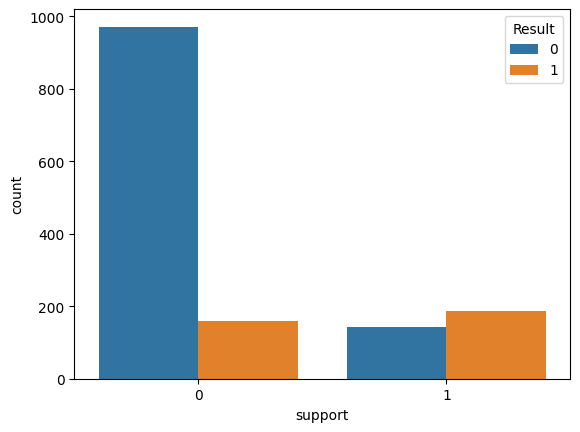

In [ ]:
#переменные support Result
sns.countplot(data=df[['support', 'Result']], x='support', hue='Result')

<Axes: xlabel='rd', ylabel='cost'>

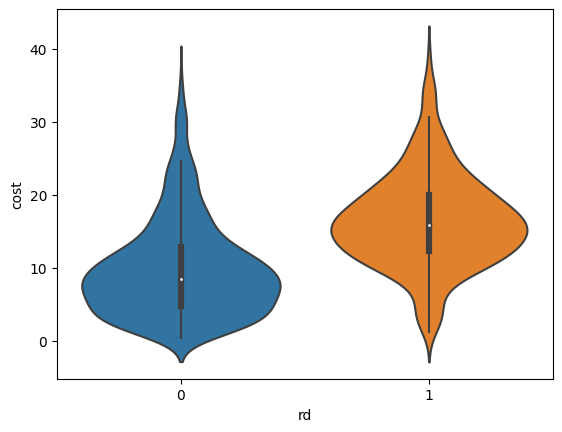

In [ ]:
#переменные rd cost
sns.violinplot(data=df, x='rd', y='cost')

<Axes: xlabel='unic', ylabel='count'>

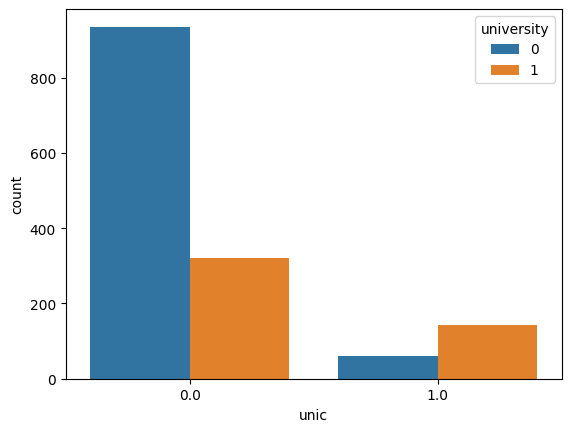

In [ ]:
#переменные unic university
sns.countplot(data=df[['unic', 'university']], x='unic', hue='university')

<Axes: xlabel='eco', ylabel='count'>

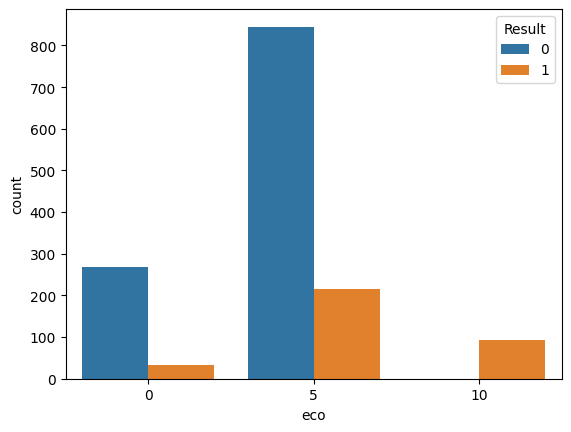

In [ ]:
#переменные Result eco
sns.countplot(data=df[['Result', 'eco']], x='eco', hue='Result')

<Axes: xlabel='Result', ylabel='count'>

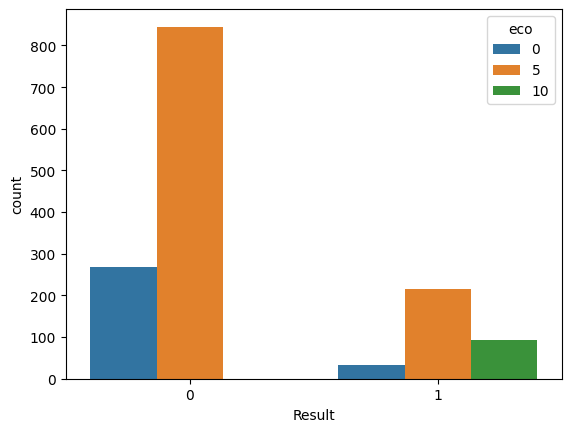

In [ ]:
#то же самое, только другой формат группировки
sns.countplot(data=df[['Result', 'eco']], x='Result', hue='eco')

In [ ]:
#таблица сопряженности по переменным foreigners и market (Result используется в качестве флага)
#countplot не используется, так как он будет практически нечитаем
pd.pivot_table(df, values='Result', index='foreigners', columns='market', aggfunc='count').fillna(0)

market,1,2,3,4
foreigners,,,,
0,1272.0,0.0,0.0,1.0
1,160.0,8.0,9.0,8.0


<Axes: xlabel='fin_support', ylabel='count'>

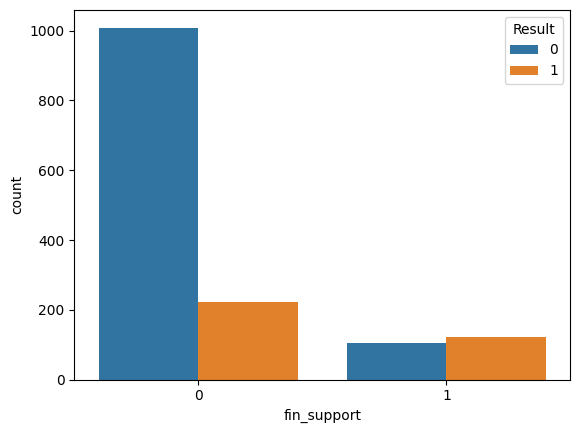

In [ ]:
#переменные Result fin_support
sns.countplot(data=df[['Result', 'fin_support']], x='fin_support', hue='Result')

Экономическая интерпретация данных на основе предварительного анализа:
1. Наличие финансовой поддержки правительства сильно увеличивает шансы получения также нефинансовой поддержки (льготные условия для аренды помещений, земли, приобретения лицензий)
2. Уникальность технологии сильно увеличивает оценку потенциала рынка
3. Наличие нефинансовой поддержки правительства сильно увеличивает шансы поддержания проекта
4. Необходимость проведения доп. исследований увеличивает объем денежных средств, необходимых для поддержки проекта, в среднем примерно на 10 млн рублей
5. Проекты с уникальной технологией чаще всего сотрудничают с университетами
6. Высокая экологичность проекта сильно повышает шансы на поддержку проекта фондом